# Домашняя работа 3
## Математическая оптимизация

В этом домашнем задании вам предстоит найти минимум функции используя метод `RMSProp`.

### Вам дана функция $y(x) = x^{3} \ln(x)$

1. Выпишите вид производной этой функции ($y'(x)$). (можно сделать это в виде latex кода, добавления картинки или записью кода python)

    $y'(x) = 3x^{2} * ln(x) + x^{2} $

2. Реализуйте функцию `dy(...)` в ячейке ниже, которая на вход принимает $x_0$, а на выходе возвращает значение производной функции $y(x)$ в точке $x_0$ (то есть $y'(x_0)$).

In [ ]:
import math
import numpy as np
def dyf(x0):
    return 3*x0**2 * math.log(x0) + x0**3 / x0

Реализуем функцию для расчета производной любой функции f(x) методом конечных разностей.

In [ ]:
def y(x):
    return x**3 * math.log(x)

def dy(x , dx=1e-6):
    return  (y(x + dx) - y(x - dx)) / (2 * dx)

In [ ]:
print(dyf(3), dy(3), sep  ="\n")

38.66253179403897
38.662531800071065


3. Реализуйте функцию `get_min_with_gd(...)`, которая принимает на вход начальную точку $x_0$, число шагов, lr и thershold; внутри себя производит поиск минимума при помощи градиентного спуска и возвращает последовательность точек, полученных на каждом шаге.

In [ ]:
def get_min_with_gd(x0, dx=0.01, n=100, threshold=1e-6):

    points = [x0]  # добавляем начальную точку в список точек
    x = x0
    for i in range(n):

        # Обновляем значение x в направлении антиградиента
        x = x - dx * dy(x)

        # Добавляем новую точку в список точек
        points.append(x)

        # Проверяем, достигнуто ли пороговое значение изменения функции между шагами
        if abs(y(points[-1]) - y(points[-2])) < threshold:
            break

    return points

In [ ]:
# Запустите поиск минимума с любой точки, например с точки 10

history = get_min_with_gd(10)

In [ ]:
print(
    len(history), 
    history[-1],
     sep = "\n"
     )

101
0.7570326551251312


4. Проверьте, что все работает ожидаемым образом, запустив ячейку ниже

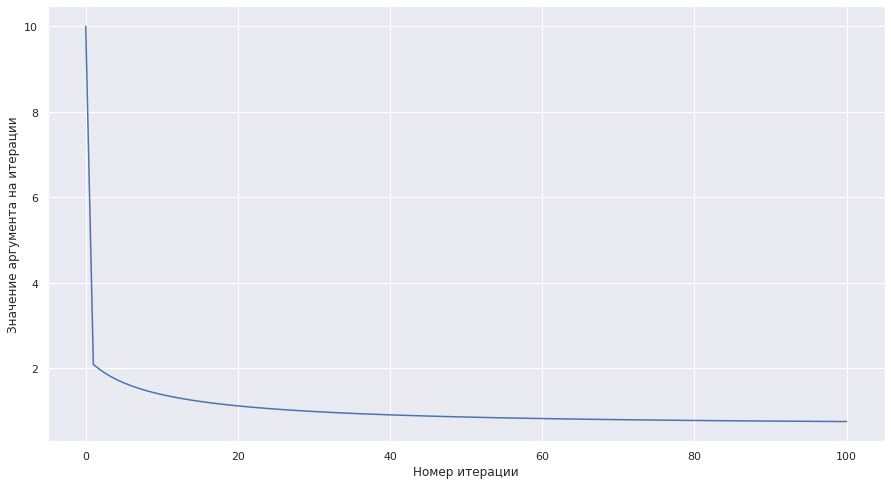

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

sns.set()

plt.figure(figsize=(15, 8), facecolor = "white")

# Отрисуем то, как менялись координаты в процессе поиска минимума
plt.plot(history)

plt.xlabel('Номер итерации')
plt.ylabel('Значение аргумента на итерации')
plt.show()

5. Реализовать поиск минимума при помощи алгоритма `RMSProp`. Реализуйте функцию `get_min_with_rmsprop(...)`, которая принимает на вход начальную точку $x_0$, число шагов, lr, $β$ и thershold; внутри себя производит поиск минимума при помощи градиентного спуска и возвращает последовательность точек, полученных на каждом шаге.

Напомним как выглядят формулы для этого алгоритма:

$$g^{n+1} = ∇f(w^{n})$$
$$\gamma^{n+1} = (1 - \beta) \gamma^{n} + \beta (g^{n+1}) ^ 2$$
$$w^{n+1} = w^n - \frac{\alpha}{\sqrt{\gamma^{n+1} + ɛ}}⋅g^{n+1}$$

Здесь $α$ -- learning rate, $ɛ$ -- малое число (можно взять 0.0001 -- оно нужно, чтобы случайно не было деления на 0), $\beta$ -- мера учета инерции

In [ ]:
def get_min_with_rmsprop(x0, alpha=0.001, beta=0.9, n=15000, threshold=1e-6, eps=0.0001):

    points = [x0]  # добавляем начальную точку в список точек
    x = x0
    g = 0
    for i in range(n):

      # Вычисляем градиент с использованием алгоритма RMSProp и обновляем гамму
      grad = dy(points[-1])
      g =  (1 - beta) * g + beta * grad**2

      # Обновляем значение x в направлении антиградиента
      x = points[-1] - alpha / np.sqrt(g + eps) * grad

      # Добавляем новую точку в список точек
      points.append(x)

      # Проверяем, достигнуто ли пороговое значение изменения функции между шагами
      if abs(y(points[-1]) - y(points[-2])) < threshold:
        break

    return points

In [ ]:
# Запустите поиск минимума с нескольких точек, например с 0 и 2
### Логарифм от 0 считается довольно плоховато, так что обойдемся без этого примера))0
history_rmsprop_1 = get_min_with_rmsprop(4)
history_rmsprop_2 = get_min_with_rmsprop(10)
history_rmsprop_n100 = get_min_with_rmsprop(10, n = 100)

6. Нарисовать график, на котором отображен реальный минимум функции и все точки, которые были получены на каждом шаге RMSProp алгоритма.

In [ ]:
#Получим значения самой функции
x_vals = np.arange(0.1, 14, 0.01)
y_vals = np.array([y(x) for x in x_vals])

In [ ]:
print(y(1/np.e))

-0.04978706836786395


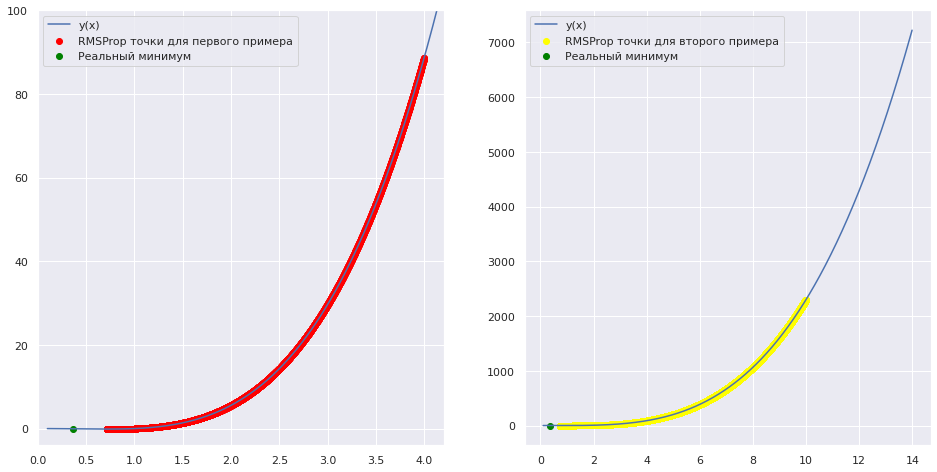

In [ ]:
fig, ax = plt.subplots(ncols=2, figsize=(16, 8))

ax[0].plot(x_vals, y_vals, label='y(x)')
ax[0].scatter(history_rmsprop_1, [y(x) for x in history_rmsprop_1], color='red', label='RMSProp точки для первого примера')
ax[0].scatter([1/np.e], [y(1/np.e)], color='green', label='Реальный минимум')
ax[0].axis(xmin=0.0, xmax=4.2, ymax = 100, ymin = -4)
ax[0].legend()

ax[1].plot(x_vals, y_vals, label='y(x)')
ax[1].scatter(history_rmsprop_2, [y(x) for x in history_rmsprop_2], color='yellow', label='RMSProp точки для второго примера')
ax[1].scatter([1/np.e], [y(1/np.e)], color='green', label='Реальный минимум')
ax[1].legend()

plt.show()

In [ ]:
print(f'Последняя точка в бычном градиентном спуске: {history[-1]}\nПоследняя точка в RMSProp: {history_rmsprop_n100[-1]}')
print(f'Последняя точка RMSProp при alpha = 0.5, n = 100000: {get_min_with_rmsprop(10, alpha = 0.5, n = 100000)[-1]}')

Последняя точка в бычном градиентном спуске: 0.7570326551251312
Последняя точка в RMSProp: 9.899942941375393
Последняя точка RMSProp при alpha = 0.5, n = 100000: 0.31062728571937726


Вывод:

Сходимость нашей функции при одинаковом шаге и числе итераций в RMSProp хуже, чем в обычном градиентном спуске. Cкорее всего это обусловлено тем, что функция очень простая и в соответствии с алгоритмом, сходимость замедляется.